In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

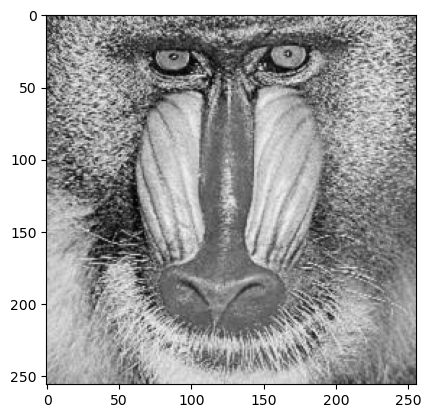

In [2]:
img = plt.imread("Mandrill.png")
plt.imshow(img,cmap='gray');

## Gaussian Blur:
$G[m,n,m_0,n_0] = F[m_0,n_0]\frac{1}{(2\pi\sigma^2)}e^{-\frac{(m-m_0)^2+(n-n_0)^2}{2\sigma^2}}$

In [3]:
def Gaussian_Blurring(given_img,sigma):
    m,n=int(np.ceil(6*sigma+1)),int(np.ceil(6*sigma+1))
    tr,tc=given_img.shape[0],given_img.shape[1]
    Final_img = np.zeros([tr+m-1,tc+n-1])
    s = 0
    if(m!=1):
        for r in range(m):
            for c in range(n):
                s = s+(1/(2*np.pi*sigma**2))*np.exp(-((r-m//2)**2+(c-n//2)**2)/(2*sigma**2))
    print(s)
    for row in tqdm(range(tr)):
        for col in range(tc):
            if(m!=1):
                for r in range(m):
                    for c in range(n):
                        Final_img[row+m//2+r-m//2][col+n//2+c-n//2] = Final_img[row+m//2+r-m//2][col+n//2+c-n//2]+given_img[row][col]*(1/(2*np.pi*sigma**2*s))*np.exp(-((r-m//2)**2+(c-n//2)**2)/(2*sigma**2))
            else:
                Final_img[row][col] = Final_img[row][col]+given_img[row][col]
    return Final_img
    
    

0.9990452992111658


100%|██████████| 256/256 [00:29<00:00,  8.79it/s]


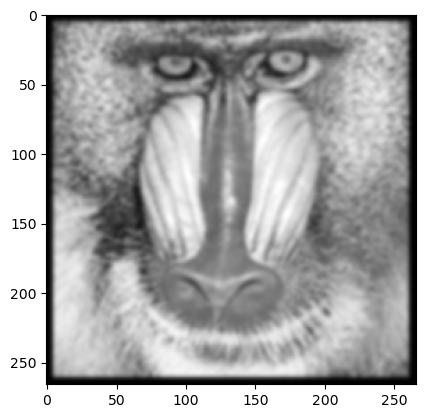

In [4]:
Fi = Gaussian_Blurring(img,sigma = 1.6)
plt.imshow(Fi,cmap='gray');

0.9997691263059617


100%|██████████| 256/256 [00:17<00:00, 14.33it/s]


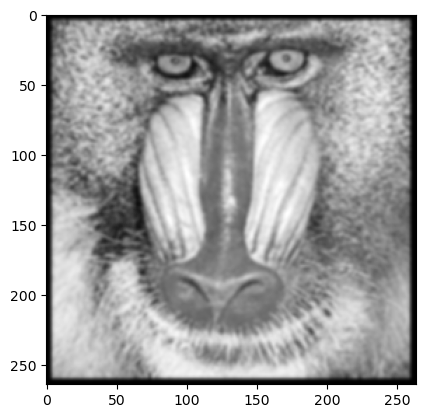

In [5]:
Fi = Gaussian_Blurring(img,sigma = 1.2)
plt.imshow(Fi,cmap='gray');

0.9994587918263365


100%|██████████| 256/256 [00:10<00:00, 23.79it/s]


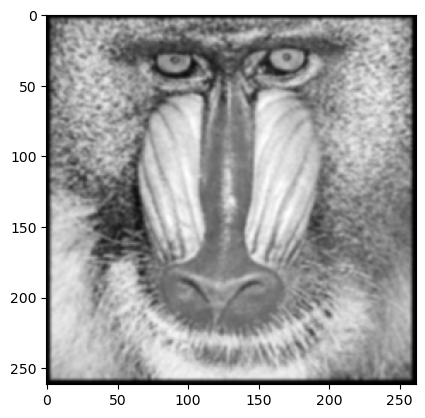

In [6]:
Fi = Gaussian_Blurring(img,sigma = 1)
plt.imshow(Fi,cmap='gray');

1.0032730604555005


100%|██████████| 256/256 [00:05<00:00, 45.96it/s]


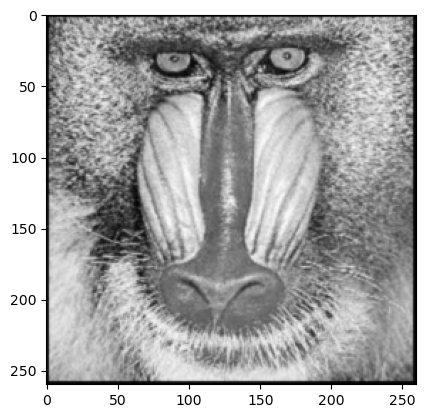

In [7]:
Fi = Gaussian_Blurring(img,sigma = 0.6)
plt.imshow(Fi,cmap='gray');

1.7958397643231931


100%|██████████| 256/256 [00:02<00:00, 126.49it/s]


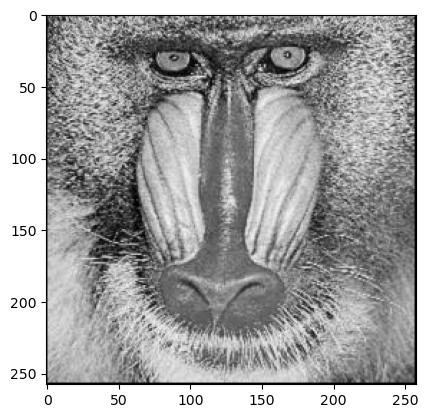

In [8]:
Fi = Gaussian_Blurring(img,sigma = 0.3)
plt.imshow(Fi,cmap='gray');

0


100%|██████████| 256/256 [00:00<00:00, 5780.61it/s]


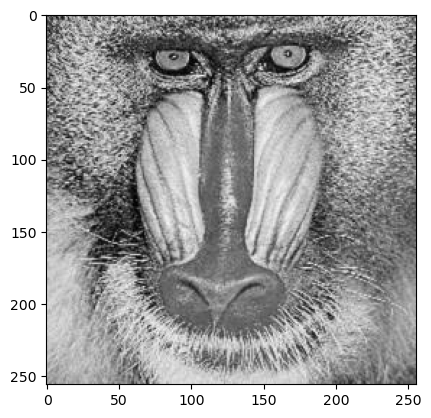

In [9]:
Fi = Gaussian_Blurring(img,sigma = 0)
plt.imshow(Fi,cmap='gray');

### Observations:
As the standard deviation increases the blurness is increasing, among given $\sigma$'s for $\sigma$=1.6 the blurness is more.<br>
As the standard deviation decreases the blurness is decreasing, among given $\sigma$'s for $\sigma$=0 the image is very clear[as actual image].